In [1]:
import cv2
import random
import os, sys
import glob
import argparse
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import os.path as osp
sys.path.insert(0, osp.join(os.getcwd(), '../', 'tools'))
import utils
from datasets import get_dataset

import pdb
import traceback

In [39]:
dataset = get_dataset('VisDrone')

bbox_cnt = 0
origin_bboxsize = []
train_list = dataset.get_imglist(split='train')
for img_path in tqdm(train_list, ncols=80):
    img = cv2.imread(img_path)
    height, width = img.shape[:2]
    label, _ = dataset.get_gtbox(img_path)
    bbox_cnt += len(label)
    for box in label:
        origin_bboxsize.append((box[2] - box[0]) / width*1920)

100%|███████████████████████████████████████| 6471/6471 [01:28<00:00, 73.38it/s]


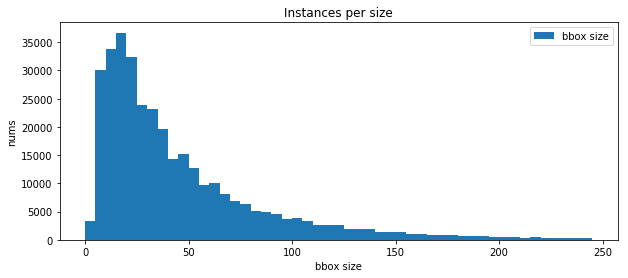

In [33]:
bins = [x*5+0 for x in range(0, 50)]
plt.rcParams['savefig.dpi'] = 300
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(origin_bboxsize, bins=bins, density=False, label='bbox size', histtype='bar')
plt.legend()
plt.xlabel('bbox size')
plt.ylabel('nums')

plt.title(u'Instances per size')
plt.savefig('visdrone_bbox.jpg')

plt.show()

<Figure size 432x288 with 0 Axes>

In [28]:
print(n, bins, patches)

[ 3288. 30038. 33762. 36684. 32316. 23814. 23201. 19675. 14377. 15232.
 12763.  9668. 10029.  8166.  6801.  6363.  5118.  4972.  4634.  3651.
  3855.  3244.  2590.  2656.  2540.  1916.  1981.  1831.  1389.  1460.
  1308.  1041.  1112.   879.   864.   829.   609.   677.   625.   488.
   562.   458.   399.   425.   383.   297.   328.   236.   287.] [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245] <a list of 49 Patch objects>


In [29]:
sum(n[:20])/sum(n)

0.8962130062591777

In [41]:
bbox_cnt / len(train_list)

53.037397620151445

In [2]:
dataset = get_dataset('TT100K')

bbox_cnt = 0
origin_bboxsize = []
train_list = dataset.get_imglist(split='train')
for img_path in tqdm(train_list, ncols=80):
    img = cv2.imread(img_path)
    height, width = img.shape[:2]
    label, _ = dataset.get_gtbox(img_path)
    bbox_cnt += len(label)
    for box in label:
        origin_bboxsize.append((box[2] - box[0]))

100%|███████████████████████████████████████| 6105/6105 [06:42<00:00, 16.01it/s]


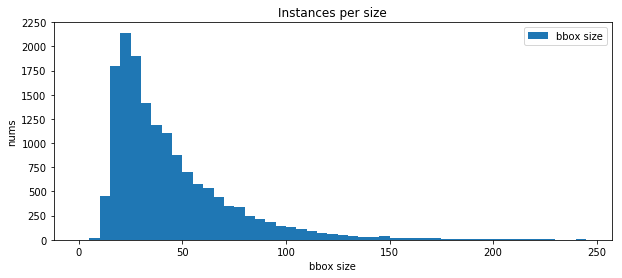

In [3]:
bins = [x*5+0 for x in range(0, 50)]
plt.rcParams['savefig.dpi'] = 300
plt.figure(figsize=(10,4))
n, bins, patches = plt.hist(origin_bboxsize, bins=bins, density=False, label='bbox size', histtype='bar')
plt.legend()
plt.xlabel('bbox size')
plt.ylabel('nums')

plt.title(u'Instances per size')
plt.savefig('tt100k_bbox.jpg')

plt.show()

In [4]:
sum(n[:20])/sum(n)

0.94578352180937

In [5]:
bbox_cnt / len(train_list)

2.536773136773137